<a href="https://colab.research.google.com/github/awhooshingwind/Math254/blob/main/mod3/HW_flux20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

from sympy import Curve, line_integrate, ln, E
import sympy as sym

sym.init_printing()

In [114]:
x, y, z, r, theta, t = sym.symbols('x y z r theta, t')

In [3]:
def greens_ther(P, Q):
  dQx = sym.diff(Q, x)
  dPy = sym.diff(P, y)
  display(dQx, dPy)
  int_R = dQx - dPy
  return int_R

def flux_int(f, g):
  dfx = sym.diff(f, x)
  dgy = sym.diff(g, y)
  int_R = dfx + dgy
  return int_R

### Ref Notes:

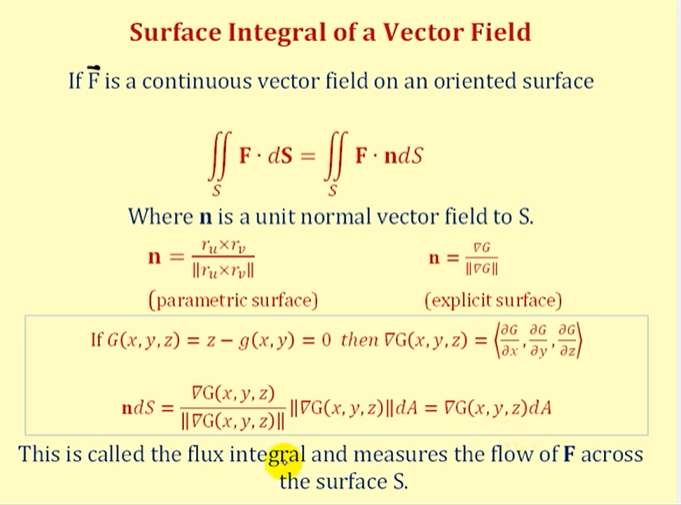

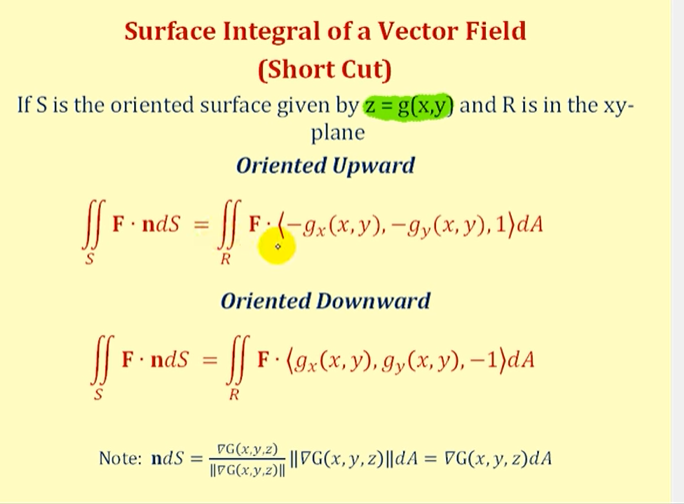

# Plotter

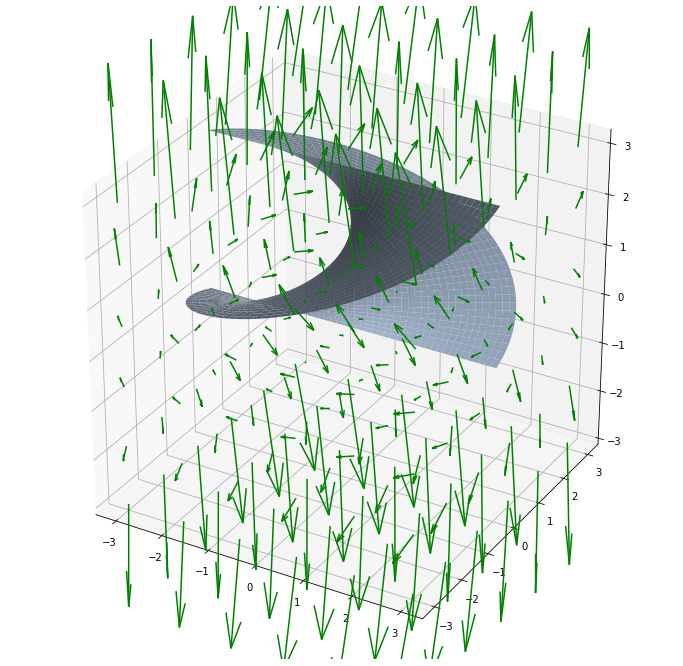

In [36]:
# Plotting
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(projection='3d')

# Set parameters
vrange = [-3, 3]
zrange = [-3, 3]
N = 6
# Surface param
Urange = [-3, 3]
Vrange = [0, np.pi]

# Make data
vals = np.linspace(vrange[0], vrange[1], N)
zvals = np.linspace(zrange[0], zrange[1], N)
X,Y,Z = np.meshgrid(vals, vals, zvals)

# Define vector field components
U = Y
V = -X
W = Z**3
# Plot vector field
ax.quiver(X,Y,Z,U,V,W, length=0.09, normalize=False, colors='g')

# Make surface data
Su_vals = np.linspace(Srange[0], Srange[1])
Sv_vals = np.linspace(Vrange[0], Vrange[1])
SU, SV = np.meshgrid(Su_vals, Sv_vals)
# Define surface
SX = SU*np.cos(SV)
SY = SU*np.sin(SV)
SZ = SV
# Plot surface
surf = ax.plot_surface(SX, SY, SZ, color='lightsteelblue')

plt.show()

### Question 1

Evaluate $ \iint_S \vec{F} \cdot d \bar{S} $, where $ \vec{F} = \left \langle y, -x, z^5 \right \rangle $ and $ S $ is the helicoid with vector equation 
$ r(u,v) = \left \langle u \cos v, u \sin v, v \right \rangle \ 0 \leq u \leq 4, \ 0 \leq v \leq \pi $ with upward orientation

In [5]:
u,v = sym.symbols('u v')

ulim = [0, 4]
vlim = [0, sym.pi]

Fvec = [y, -x, z**5]
r_uv = [u*sym.cos(v), u*sym.sin(v), v]
display(Fvec, r_uv)

In [6]:
F_uv = [u*sym.sin(v), -u*sym.cos(v), v**5]

rdu = [sym.diff(r, u) for r in r_uv]
rdv = [sym.diff(r, v) for r in r_uv]

rdu, rdv

In [7]:
rdu, rdv = sym.Matrix([rdu]), sym.Matrix([rdv])
cross_prod = sym.simplify(rdu.cross(rdv))

cross_prod

[sin(v)  -cos(v)  u]

In [8]:
F_uv, cross_prod = sym.Matrix([F_uv]), sym.Matrix([cross_prod])

int_R = sym.simplify(F_uv.dot(cross_prod))
int_R

In [9]:
sol = sym.integrate(int_R, (u, ulim[0], ulim[1]), (v, vlim[0], vlim[1]))
display(sol)
sol.evalf()

### Question 2

Find the flux of the vector field $ \vec{F} = \left \langle y,-z,x \right \rangle $ across the part of the plane $ z = 3 + x + 4y $ above the rectangle $ [0, 2] \times [0, 5] $ with upwards orientation.

In [10]:
z = 3 + x + 4*y

xlim = [0, 2]
ylim = [0, 5]

gx = sym.diff(z, x)
gy = sym.diff(z, y)

gx, gy

In [11]:
F_vec = sym.Matrix([y, -z, x])
gdot = sym.Matrix([-gx, -gy, 1])

F_vec, gdot

⎛⎡     y      ⎤  ⎡-1⎤⎞
⎜⎢            ⎥  ⎢  ⎥⎟
⎜⎢-x - 4⋅y - 3⎥, ⎢-4⎥⎟
⎜⎢            ⎥  ⎢  ⎥⎟
⎝⎣     x      ⎦  ⎣1 ⎦⎠

In [12]:
int_R = F_vec.dot(gdot)
int_R

In [13]:
sol = sym.integrate(int_R, (x, xlim[0], xlim[1]), (y, ylim[0], ylim[1]))
sol

### Question 3: 

$$ \text{Mass Flow Rate} = \iint_S \rho \vec{F} \cdot d \vec{S} = \iint_S \rho \vec{F} \cdot \vec{N} \ dS $$

$$ = \int_R \rho \vec{F} \cdot \left \langle -g_x(x,y), -g_y(x, y), 1 \right \rangle \ dA \text{ (upward orientation)} $$ 

A fluid has density 800 kg/m3 and flows with velocity $ \vec{v} = x\vec{i} + y \vec{j} + z \vec{k} $, where x, y, and z are measured in meters, and the components of $ \vec{v} $ are measured in meters per second.

Find the rate of flow outward through the part of the paraboloid $ z = 49 - x^2 - y^2 $ that lies above the xy plane.

In [14]:
p = 800
z = 49 - x**2 - y**2
Fvec = [x, y, z]


p, Fvec

In [15]:
gx = sym.diff(z, x)
gy = sym.diff(z, y)

gx, gy

In [21]:
int_R = sym.Matrix([Fvec]).dot(sym.Matrix([-gx, -gy, 1]))
int_R


In [23]:
# Convert to Polar
r, theta = sym.symbols('r theta')
rlim = [0, 7]
theta_lim = [0, 2*sym.pi]

int_R = r* int_R.subs(x**2 + y**2, r**2)
display(int_R)

In [27]:
sol = p * sym.integrate(int_R, (r, rlim[0], rlim[1]), (theta, theta_lim[0], theta_lim[1]))
display(sol)
sol.evalf()

### Question 4: Flux Integral (Parametric Surface)
Find the flux of the vector field $ \bar{F} = \left \langle x^4, z, -y \right \rangle $ through the helicoid with the parameterization 
$ r(u, v) = \left \langle v, u \cos v, u \sin v \right \rangle $ 
$ 0 \leq u \leq 3, \ 0 \leq v \leq \pi $
 oriented away from the origin.

In [62]:
r_uv = [v, u*sym.cos(v), u*sym.sin(v)]
Fvec = sym.Matrix([
                   v**4, u*sym.sin(v), -u*sym.cos(v)
                   ])


ulim = [0, 3]
vlim = [0, sym.pi]

Fvec, r_uv

⎛⎡    4    ⎤                         ⎞
⎜⎢   v     ⎥                         ⎟
⎜⎢         ⎥                         ⎟
⎜⎢u⋅sin(v) ⎥, [v, u⋅cos(v), u⋅sin(v)]⎟
⎜⎢         ⎥                         ⎟
⎝⎣-u⋅cos(v)⎦                         ⎠

In [63]:
dru = sym.Matrix([sym.diff(r, u) for r in r_uv])
drv = sym.Matrix([sym.diff(r, v) for r in r_uv])

dru, drv

⎛⎡  0   ⎤  ⎡    1    ⎤⎞
⎜⎢      ⎥  ⎢         ⎥⎟
⎜⎢cos(v)⎥, ⎢-u⋅sin(v)⎥⎟
⎜⎢      ⎥  ⎢         ⎥⎟
⎝⎣sin(v)⎦  ⎣u⋅cos(v) ⎦⎠

In [64]:
cross_prod = sym.simplify(dru.cross(drv))
cross_prod

⎡   u   ⎤
⎢       ⎥
⎢sin(v) ⎥
⎢       ⎥
⎣-cos(v)⎦

In [65]:
int_R = sym.simplify(Fvec.dot(cross_prod))
int_R

In [66]:
sol = sym.integrate(int_R, (u, ulim[0], ulim[1]), (v, vlim[0], vlim[1]))
display(sol)
sol.evalf()

### Question 5:

A fluid has density 900 kg/m3 and flows with velocity $ \vec{v} = x\vec{i} + y \vec{j} + z \vec{k} $, where x, y, and z are measured in meters, and the components of $ \vec{v} $ are measured in meters per second.

Find the rate of flow outward through the part of the paraboloid $ y = 1 - x^2 - z^2 $ where $ y > 0 $.

In [94]:
p = 800
x = 16 - y**2 - z**2
Fvec = [x, y, z]


p, Fvec

In [96]:
gy = sym.diff(x, y)
gz = sym.diff(x, z)

gy, gz

In [99]:
int_R = sym.Matrix([Fvec]).dot(sym.Matrix([1, -gy, -gz]))
int_R = sym.factor(int_R)
int_R


In [100]:
# Convert to Polar
r, theta = sym.symbols('r theta')
rlim = [0, 4]
theta_lim = [0, 2*sym.pi]

int_R = r*int_R.subs(y**2 + z**2, r**2)
display(int_R)

In [101]:
sol = p * sym.integrate(int_R, (r, rlim[0], rlim[1]), (theta, theta_lim[0], theta_lim[1]))
display(sol)
sol.evalf()

### Question 6

In [104]:
z = 3 + 4*x + 2*y

xlim = [0, 4]
ylim = [0, 3]

gx = sym.diff(z, x)
gy = sym.diff(z, y)

gx, gy

In [105]:
F_vec = sym.Matrix([y, -z, x])
gdot = sym.Matrix([-gx, -gy, 1])

F_vec, gdot

⎛⎡      y       ⎤  ⎡-4⎤⎞
⎜⎢              ⎥  ⎢  ⎥⎟
⎜⎢-4⋅x - 2⋅y - 3⎥, ⎢-2⎥⎟
⎜⎢              ⎥  ⎢  ⎥⎟
⎝⎣      x       ⎦  ⎣1 ⎦⎠

In [106]:
int_R = F_vec.dot(gdot)
int_R

In [107]:
sol = sym.integrate(int_R, (x, xlim[0], xlim[1]), (y, ylim[0], ylim[1]))
sol

### Question 7: Flux Integral (Parametric Surface)
Find the flux of the vector field $ \bar{F} = \left \langle x^3, z, -y \right \rangle $ through the helicoid with the parameterization 
$ r(u, v) = \left \langle v, u \cos v, u \sin v \right \rangle $ 
$ 0 \leq u \leq 3, \ 0 \leq v \leq \pi $
 oriented away from the origin.

In [108]:
r_uv = [v, u*sym.cos(v), u*sym.sin(v)]
Fvec = sym.Matrix([
                   v**3, u*sym.sin(v), -u*sym.cos(v)
                   ])


ulim = [0, 3]
vlim = [0, sym.pi]

Fvec, r_uv

⎛⎡    3    ⎤                         ⎞
⎜⎢   v     ⎥                         ⎟
⎜⎢         ⎥                         ⎟
⎜⎢u⋅sin(v) ⎥, [v, u⋅cos(v), u⋅sin(v)]⎟
⎜⎢         ⎥                         ⎟
⎝⎣-u⋅cos(v)⎦                         ⎠

In [110]:
dru = sym.Matrix([sym.diff(r, u) for r in r_uv])
drv = sym.Matrix([sym.diff(r, v) for r in r_uv])

dru, drv

⎛⎡  0   ⎤  ⎡    1    ⎤⎞
⎜⎢      ⎥  ⎢         ⎥⎟
⎜⎢cos(v)⎥, ⎢-u⋅sin(v)⎥⎟
⎜⎢      ⎥  ⎢         ⎥⎟
⎝⎣sin(v)⎦  ⎣u⋅cos(v) ⎦⎠

In [111]:
cross_prod = sym.simplify(dru.cross(drv))
cross_prod

⎡   u   ⎤
⎢       ⎥
⎢sin(v) ⎥
⎢       ⎥
⎣-cos(v)⎦

In [112]:
int_R = sym.simplify(Fvec.dot(cross_prod))
int_R

In [113]:
sol = sym.integrate(int_R, (u, ulim[0], ulim[1]), (v, vlim[0], vlim[1]))
display(sol)
sol.evalf()

### Question 8:

In [115]:
p = 1100
z = 4 - x**2 - y**2
Fvec = [x, y, z]


p, Fvec

In [118]:
gx = sym.diff(z, x)
gy = sym.diff(z, y)

gx, gy

In [123]:
int_R = sym.Matrix([Fvec]).dot(sym.Matrix([-gx, -gy, 1]))
int_R = sym.factor(int_R)
int_R


In [124]:
# Convert to Polar
r, theta = sym.symbols('r theta')
rlim = [0, 2]
theta_lim = [0, 2*sym.pi]

int_R = r*int_R.subs(x**2 + y**2, r**2)
display(int_R)

In [125]:
sol = p * sym.integrate(int_R, (r, rlim[0], rlim[1]), (theta, theta_lim[0], theta_lim[1]))
display(sol)
sol.evalf()